# Exploratory Data Analysis

#### Steps below research & address:  

    1. over-correlations, >90% - remove a feature with too much correlation?
    2. best separations between features - add weight to features with high separation?
    3. data distribution curves - Normal? bi-nomial?, guassian?
    4. Statistical distribution - is there a difference that confirms the hypothesis test?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, poisson, norm, t, ttest_ind
from numpy.random import seed
from scipy import stats

#  READ IN DATAFILES
df = pd.read_csv('Data/data.csv')     ## full dataframe with string target 
data = pd.read_csv('Data/df.csv')     ## Boolean encoded
X = pd.read_csv('Data/X.csv')         ## X data - features
Y1 = pd.read_csv('Data/Y1.csv')       ## Y data - Target 'class'
Y2 = pd.read_csv('Data/Y2.csv')       ## Y data - Target 'category'
columns = X.columns                   ## list of features
                     
#Tdata = np.c_[np.ones((X.shape[0], 1)), X]     ## Tensorflow variable

### 1.  Look at correlations, quick search for correlations >90%

<AxesSubplot:>

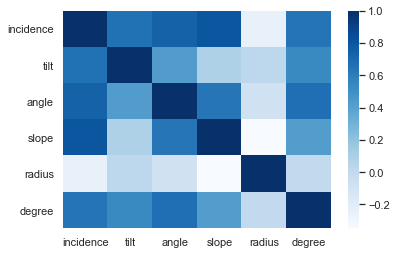

In [3]:
sns.set(rc={'figure.figsize':(6,4)})
sns.heatmap(df.corr(), cmap="Blues")

**The heatmap shows a strong correlation between 'slope' and 'incidence'.**

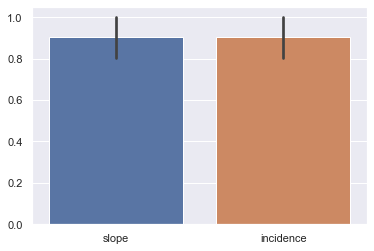

In [4]:
## Take a look at the correlation between slope and intercept
two = df[['slope','incidence']]
ax = sns.barplot(data=two.corr())

**Pretty close to 90%- lets run some code that simply removes any correlations > 90%**

In [5]:
# Remove features that have >90% correlation with each other
corr = X.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
data = X[selected_columns]

__All features passed - all 6 will be included in the model__

### 2. Review correlations for separation - should any pairs be considered for more weight?

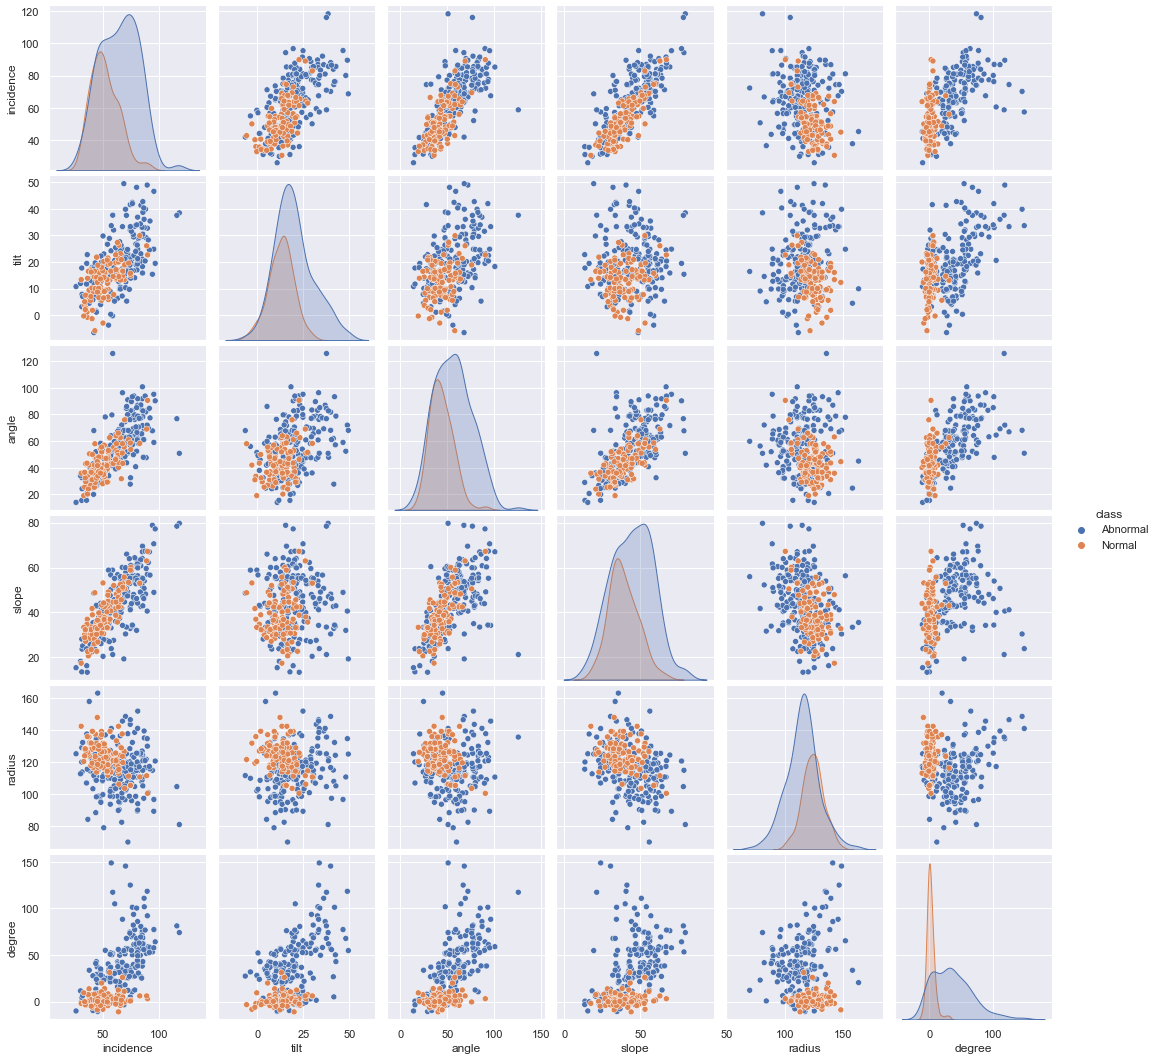

In [6]:
sns.pairplot(df, hue="class")       # "Class" only correlations
plt.show()

**Good separation between degree and all other features - weight more heavily in parameter tuning**

### 3. data distribution curves

Text(0.5, 1.02, 'Data Distribution of Each Feature')

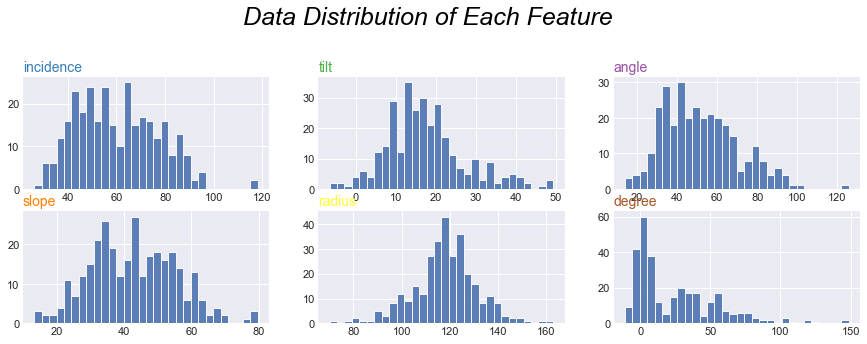

In [7]:
#                                  PLOT DATA DISTRIBUTION OF ALL FEATURES
sns.set(rc={'figure.figsize':(15,7)})
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
num = 0
for column in X:
    num+=1
    plt.subplot(3,3, num)
    plt.hist(X[column], bins=30, alpha=0.9, label=column)
#    plt.xlim(0,10)
#    plt.ylim(-2,22)
    
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
    
    plt.title(column, loc='left', fontsize=14, fontweight=0, color=palette(num))

plt.suptitle("Data Distribution of Each Feature", fontsize=25, fontweight=0, color='black', style='italic', y=1.02)

**Mostly normal distributions, with only 309 samples more samples needed to confirm shapes of degree, incidence, and slope but for now, close enough for testing.**

### 4. Statistical distribution

**Perform hypothesis test: There is no statistical difference between abnormal and normal target results for each feature**

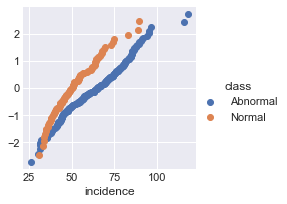

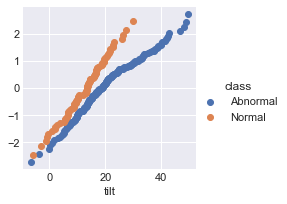

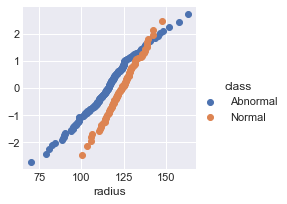

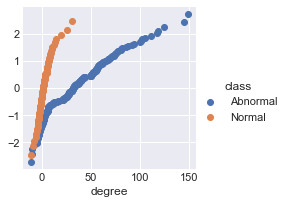

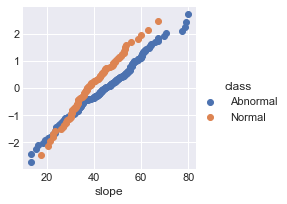

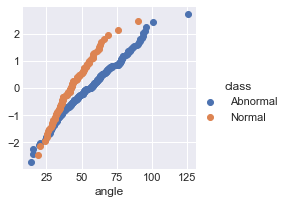

In [8]:
columns = ['incidence', 'tilt','radius','degree','slope', 'angle']
for column in columns:
    x = df[[column, 'class']]

    def quantile_plot(x, **kwargs):
        quantiles, xr = stats.probplot(x, fit=False)
        plt.scatter(xr, quantiles, **kwargs)

#    g = sns.FacetGrid(x, col="class", height=3)
    g = sns.FacetGrid(x, hue='class', height=3)
    g.map(quantile_plot, column)
    g.add_legend()

In [13]:
columns = ['incidence','angle','slope','degree','tilt','radius']
def test(y, var):
    for column in columns:
        a, b = stats.ttest_ind(y,X[column], equal_var = var)
        print("The p-value for ",column,":  ",np.mean(b))
        print("The ttest for ",column,": ",abs(np.mean(a)))

In [15]:
print("P-values for the Radius target vs all Features: ",test(X[['radius']],False))

The p-value for  incidence :   4.585775729676822e-202
The ttest for  incidence :  47.27610403029368
The p-value for  angle :   2.5626475768336805e-211
The ttest for  angle :  50.74360349864518
The p-value for  slope :   1.9665876707156713e-301
The ttest for  slope :  71.92205188974408
The p-value for  degree :   5.858462871485352e-178
The ttest for  degree :  49.43881353547932
The p-value for  tilt :   0.0
The ttest for  tilt :  105.86697118915589
The p-value for  radius :   1.0
The ttest for  radius :  0.0
P-values for the Radius target vs all Features:  None


In [16]:
print("P-values for the Tilt target vs all Features: ",test(X[['tilt']],False))

The p-value for  incidence :   2.0567136676661206e-151
The ttest for  incidence :  38.37254564258045
The p-value for  angle :   2.769929364605397e-105
The ttest for  angle :  28.62271016307982
The p-value for  slope :   1.1843221868627964e-106
The ttest for  slope :  27.344513908306777
The p-value for  degree :   4.771155769398115e-05
The ttest for  degree :  4.11463730476948
The p-value for  tilt :   1.0
The ttest for  tilt :  0.0
The p-value for  radius :   0.0
The ttest for  radius :  105.86697118915589
P-values for the Tilt target vs all Features:  None


In [17]:
print("P-values for the Slope target vs all Features: ",test(X[['slope']],False))

The p-value for  incidence :   1.2836950497963163e-41
The ttest for  incidence :  14.674243126747355
The p-value for  angle :   1.7337990532928204e-12
The ttest for  angle :  7.222382237431311
The p-value for  slope :   1.0
The ttest for  slope :  0.0
The p-value for  degree :   2.0909117429984466e-19
The ttest for  degree :  9.475730957690342
The p-value for  tilt :   1.1843221868627964e-106
The ttest for  tilt :  27.344513908306777
The p-value for  radius :   1.9665876707156713e-301
The ttest for  radius :  71.92205188974408
P-values for the Slope target vs all Features:  None


In [18]:
print("P-values for the Degree target vs all Features: ",test(X[['degree']],False))

The p-value for  incidence :   2.3358777602086048e-55
The ttest for  incidence :  17.910934723601436
The p-value for  angle :   5.159656663523279e-35
The ttest for  angle :  13.331752242270788
The p-value for  slope :   2.0909117429984466e-19
The ttest for  slope :  9.475730957690342
The p-value for  degree :   1.0
The ttest for  degree :  0.0
The p-value for  tilt :   4.771155769398115e-05
The ttest for  tilt :  4.11463730476948
The p-value for  radius :   5.858462871485352e-178
The ttest for  radius :  49.43881353547932
P-values for the Degree target vs all Features:  None


In [19]:
print("P-values for the Incidence target vs all Features: ",test(X[['incidence']],False))

The p-value for  incidence :   1.0
The ttest for  incidence :  0.0
The p-value for  angle :   8.289127898850462e-09
The ttest for  angle :  5.844256195986753
The p-value for  slope :   1.2836950497963163e-41
The ttest for  slope :  14.674243126747355
The p-value for  degree :   2.3358777602086048e-55
The ttest for  degree :  17.910934723601436
The p-value for  tilt :   2.0567136676661206e-151
The ttest for  tilt :  38.37254564258045
The p-value for  radius :   4.585775729676822e-202
The ttest for  radius :  47.27610403029368
P-values for the Incidence target vs all Features:  None


In [20]:
print("P-values for the Angle target vs all Features: ",test(X[['angle']],False))

The p-value for  incidence :   8.289127898850462e-09
The ttest for  incidence :  5.844256195986753
The p-value for  angle :   1.0
The ttest for  angle :  0.0
The p-value for  slope :   1.7337990532928204e-12
The ttest for  slope :  7.222382237431311
The p-value for  degree :   5.159656663523279e-35
The ttest for  degree :  13.331752242270788
The p-value for  tilt :   2.769929364605397e-105
The ttest for  tilt :  28.62271016307982
The p-value for  radius :   2.5626475768336805e-211
The ttest for  radius :  50.74360349864518
P-values for the Angle target vs all Features:  None


### Looking at p-values for hypothesis test, all features pass the alpha of 0.5% and will be included in the machine learning models